In [22]:
import os

class cfg():
    data_path = "data"

    seed = 42

    holidays_path = os.path.join(data_path, "holidays.csv")
    products_path = os.path.join(data_path, "products.csv")
    promotions_path = os.path.join(data_path, "promotions.csv")
    sample_submission_path = os.path.join(data_path, "sample_submission.csv")
    test_path = os.path.join(data_path, "test.csv")
    train_path = os.path.join(data_path, "train.csv")


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt


holidays_df = pd.read_csv(cfg.holidays_path)
products_df = pd.read_csv(cfg.products_path)
promotions_df = pd.read_csv(cfg.promotions_path)
sample_submission_df = pd.read_csv(cfg.sample_submission_path, delimiter='|')
test_df = pd.read_csv(cfg.test_path)
train_df = pd.read_csv(cfg.train_path)

# Convert columns to datetime format

train_df["week_starting_date"] = pd.to_datetime(train_df["week_starting_date"])
test_df["week_starting_date"] = pd.to_datetime(test_df["week_starting_date"])
sample_submission_df["week_starting_date"] = pd.to_datetime(sample_submission_df["week_starting_date"])

In [23]:
most_selling_1000 = train_df[train_df["sales_quantity"]>1000]

most_selling_1000_ids = most_selling_1000["product_id"].unique()

len(most_selling_1000["product_id"].unique())

741

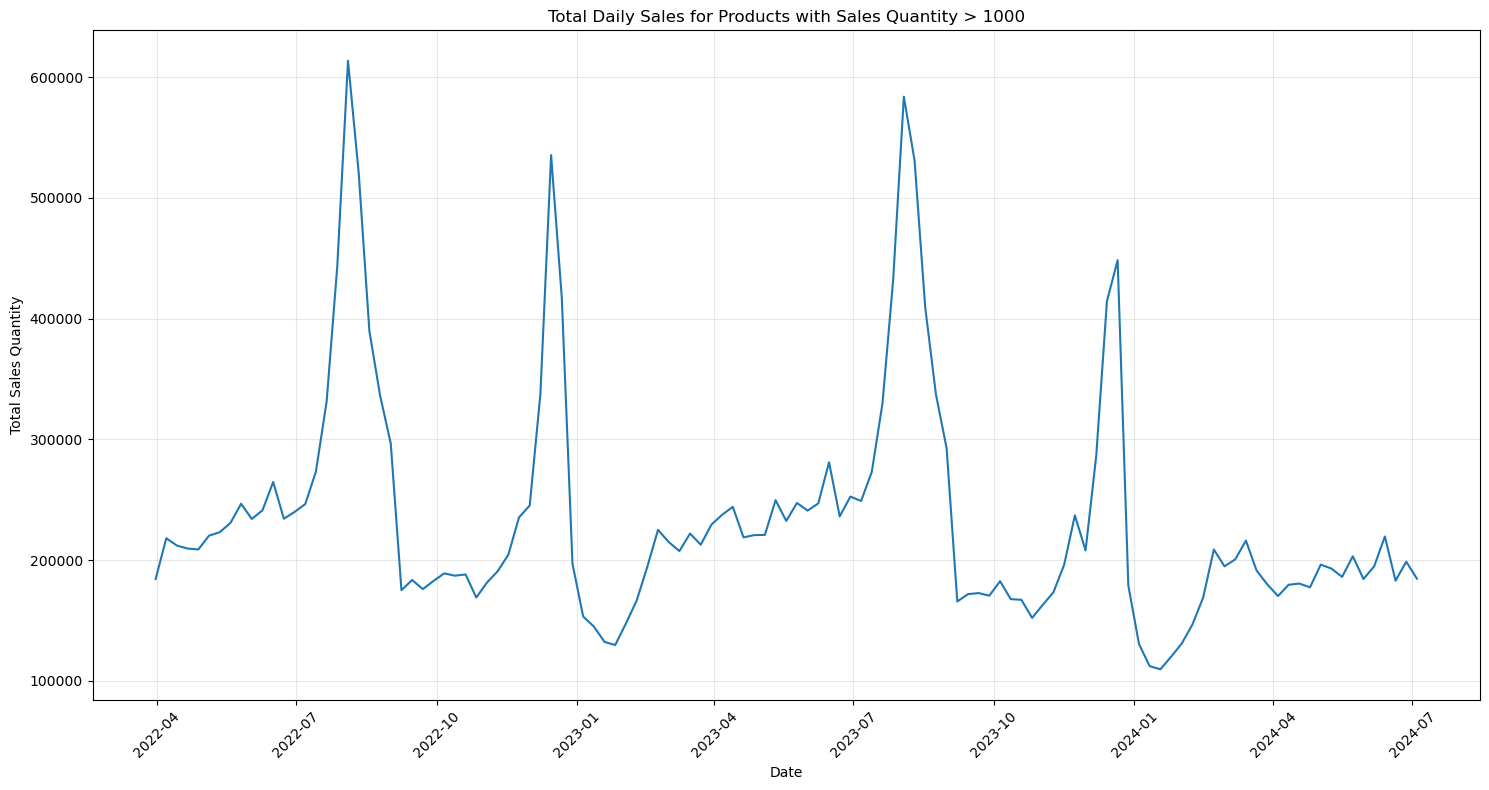

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

most_selling_1000 = train_df[train_df["sales_quantity"]>1000]

most_selling_1000_ids = most_selling_1000["product_id"].unique()

len(most_selling_1000["product_id"].unique())


# Filter the dataframe for products with sales > 1000
time_series_df = train_df[train_df['product_id'].isin(most_selling_1000_ids)]

# Alternative visualization: If there are too many products, you might want to show the total daily sales
daily_sales = time_series_df.groupby('week_starting_date')['sales_quantity'].sum().reset_index()

plt.figure(figsize=(15, 8))
plt.plot(daily_sales['week_starting_date'], daily_sales['sales_quantity'])
plt.xlabel('Date')
plt.ylabel('Total Sales Quantity')
plt.title('Total Daily Sales for Products with Sales Quantity > 1000')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


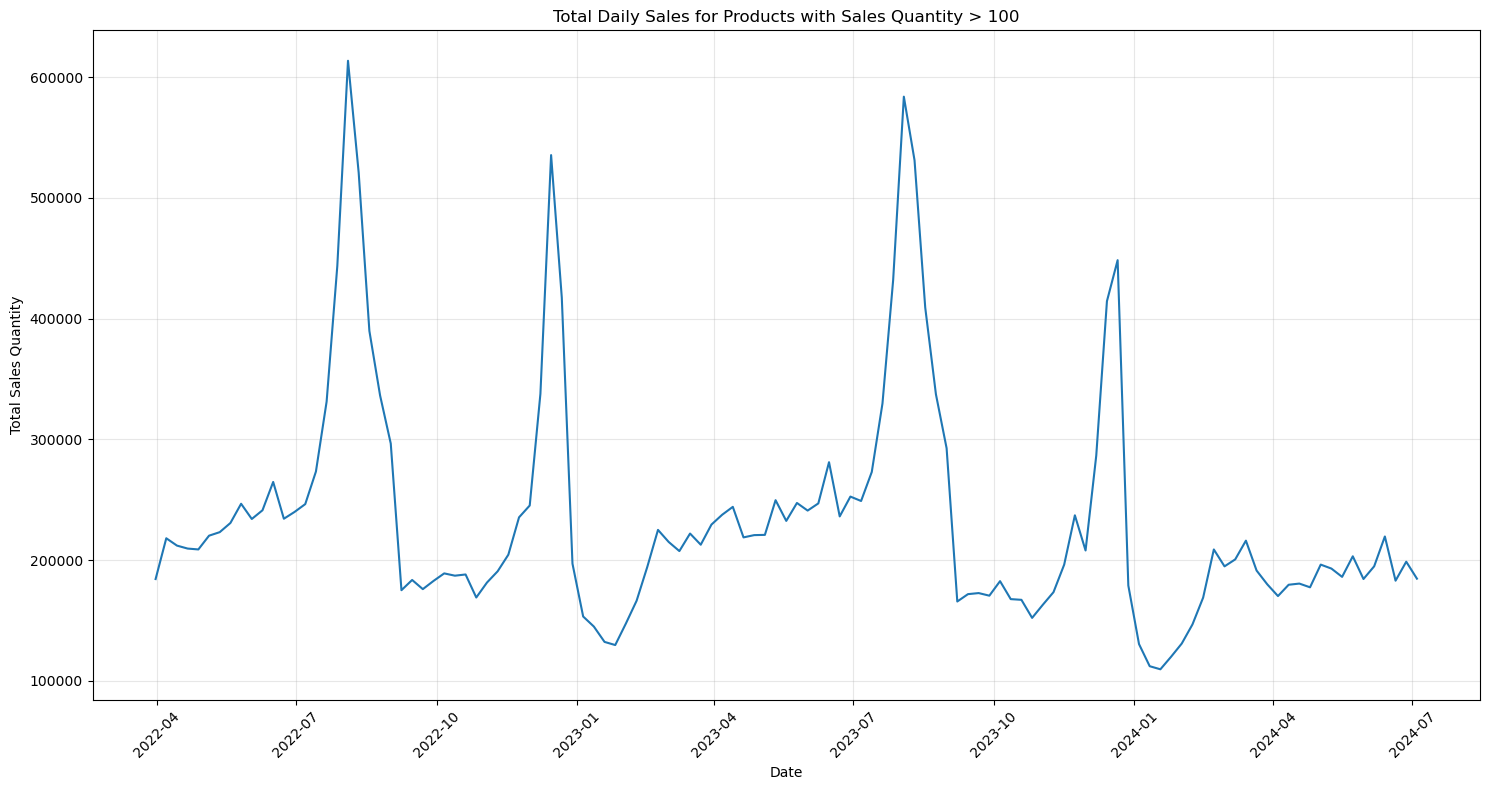

In [25]:
most_selling_100 = train_df[train_df["sales_quantity"]>1000]

most_selling_100_ids = most_selling_100["product_id"].unique()

len(most_selling_100["product_id"].unique())


# Filter the dataframe for products with sales > 1000
time_series_df = train_df[train_df['product_id'].isin(most_selling_100_ids)]

# Alternative visualization: If there are too many products, you might want to show the total daily sales
daily_sales = time_series_df.groupby('week_starting_date')['sales_quantity'].sum().reset_index()

plt.figure(figsize=(15, 8))
plt.plot(daily_sales['week_starting_date'], daily_sales['sales_quantity'])
plt.xlabel('Date')
plt.ylabel('Total Sales Quantity')
plt.title('Total Daily Sales for Products with Sales Quantity > 100')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


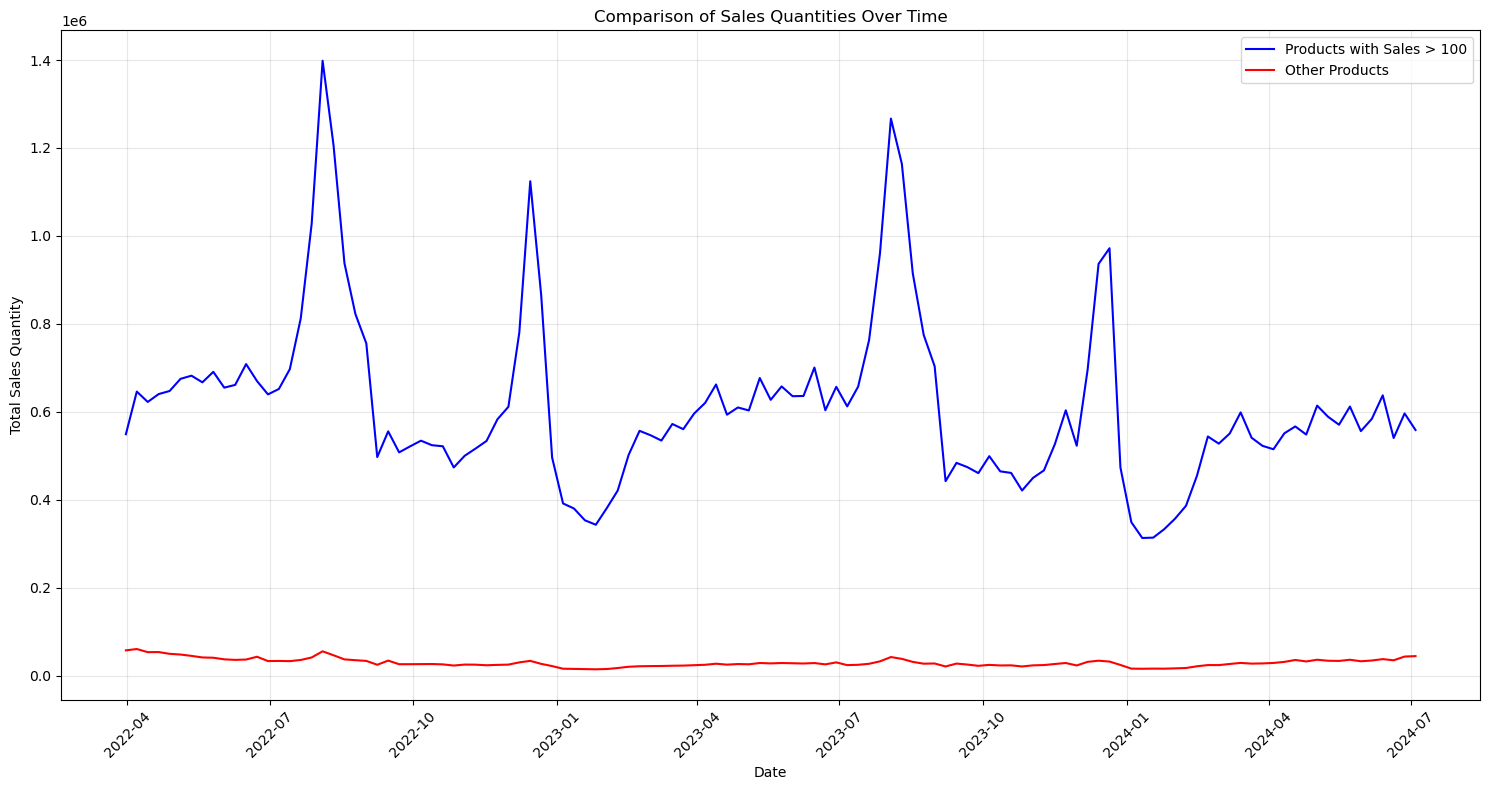


Summary Statistics:
Total sales for products >100: 73,051,843.0
Total sales for other products: 3,554,448.0


In [26]:
most_selling_100 = train_df[train_df["sales_quantity"]>100]

most_selling_100_ids = most_selling_100["product_id"].unique()

len(most_selling_100["product_id"].unique())


# Filter the dataframe for products with sales > 1000
time_series_df = train_df[train_df['product_id'].isin(most_selling_100_ids)]

# Filter the dataframe for products with sales <= 1000
other_products_df = train_df[~train_df['product_id'].isin(most_selling_100_ids)]

# Calculate daily sales for both groups
daily_sales_high = time_series_df.groupby('week_starting_date')['sales_quantity'].sum().reset_index()
daily_sales_other = other_products_df.groupby('week_starting_date')['sales_quantity'].sum().reset_index()

# Create the plot
plt.figure(figsize=(15, 8))

# Plot both lines
plt.plot(daily_sales_high['week_starting_date'], daily_sales_high['sales_quantity'], 
         label='Products with Sales > 100', color='blue')
plt.plot(daily_sales_other['week_starting_date'], daily_sales_other['sales_quantity'], 
         label='Other Products', color='red')

# Customize the plot
plt.xlabel('Date')
plt.ylabel('Total Sales Quantity')
plt.title('Comparison of Sales Quantities Over Time')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

# Optional: Print some summary statistics
print("\nSummary Statistics:")
print(f"Total sales for products >100: {daily_sales_high['sales_quantity'].sum():,}")
print(f"Total sales for other products: {daily_sales_other['sales_quantity'].sum():,}")


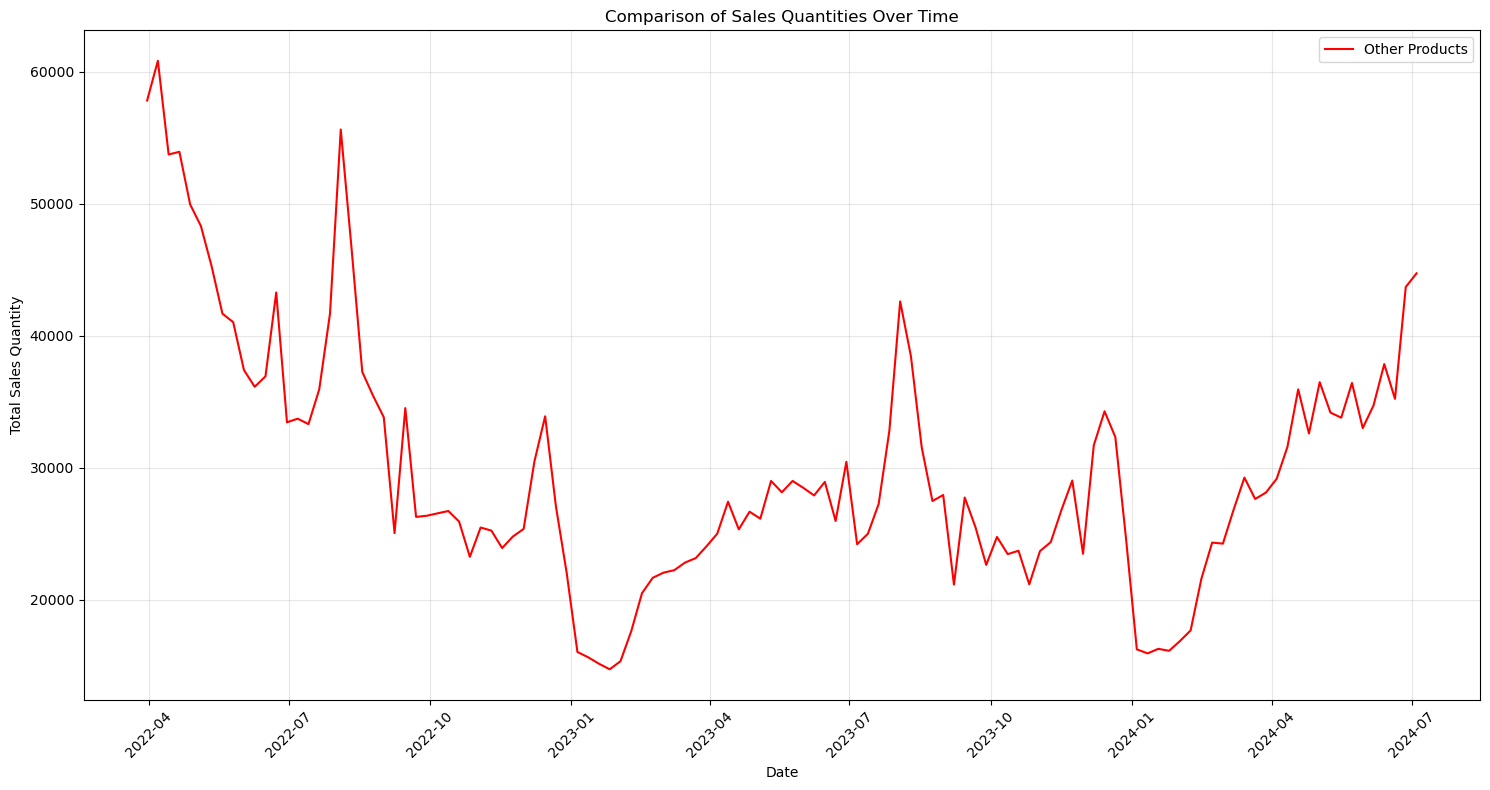


Summary Statistics:
Total sales for products >100: 73,051,843.0
Total sales for other products: 3,554,448.0


In [27]:
most_selling_100 = train_df[train_df["sales_quantity"]>100]

most_selling_100_ids = most_selling_100["product_id"].unique()

len(most_selling_100["product_id"].unique())


# Filter the dataframe for products with sales > 100
time_series_df = train_df[train_df['product_id'].isin(most_selling_100_ids)]

# Filter the dataframe for products with sales <= 100
other_products_df = train_df[~train_df['product_id'].isin(most_selling_100_ids)]

# Calculate daily sales for both groups
daily_sales_high = time_series_df.groupby('week_starting_date')['sales_quantity'].sum().reset_index()
daily_sales_other = other_products_df.groupby('week_starting_date')['sales_quantity'].sum().reset_index()

# Create the plot
plt.figure(figsize=(15, 8))

# Plot both lines
plt.plot(daily_sales_other['week_starting_date'], daily_sales_other['sales_quantity'], 
         label='Other Products', color='red')

# Customize the plot
plt.xlabel('Date')
plt.ylabel('Total Sales Quantity')
plt.title('Comparison of Sales Quantities Over Time')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

# Optional: Print some summary statistics
print("\nSummary Statistics:")
print(f"Total sales for products >100: {daily_sales_high['sales_quantity'].sum():,}")
print(f"Total sales for other products: {daily_sales_other['sales_quantity'].sum():,}")

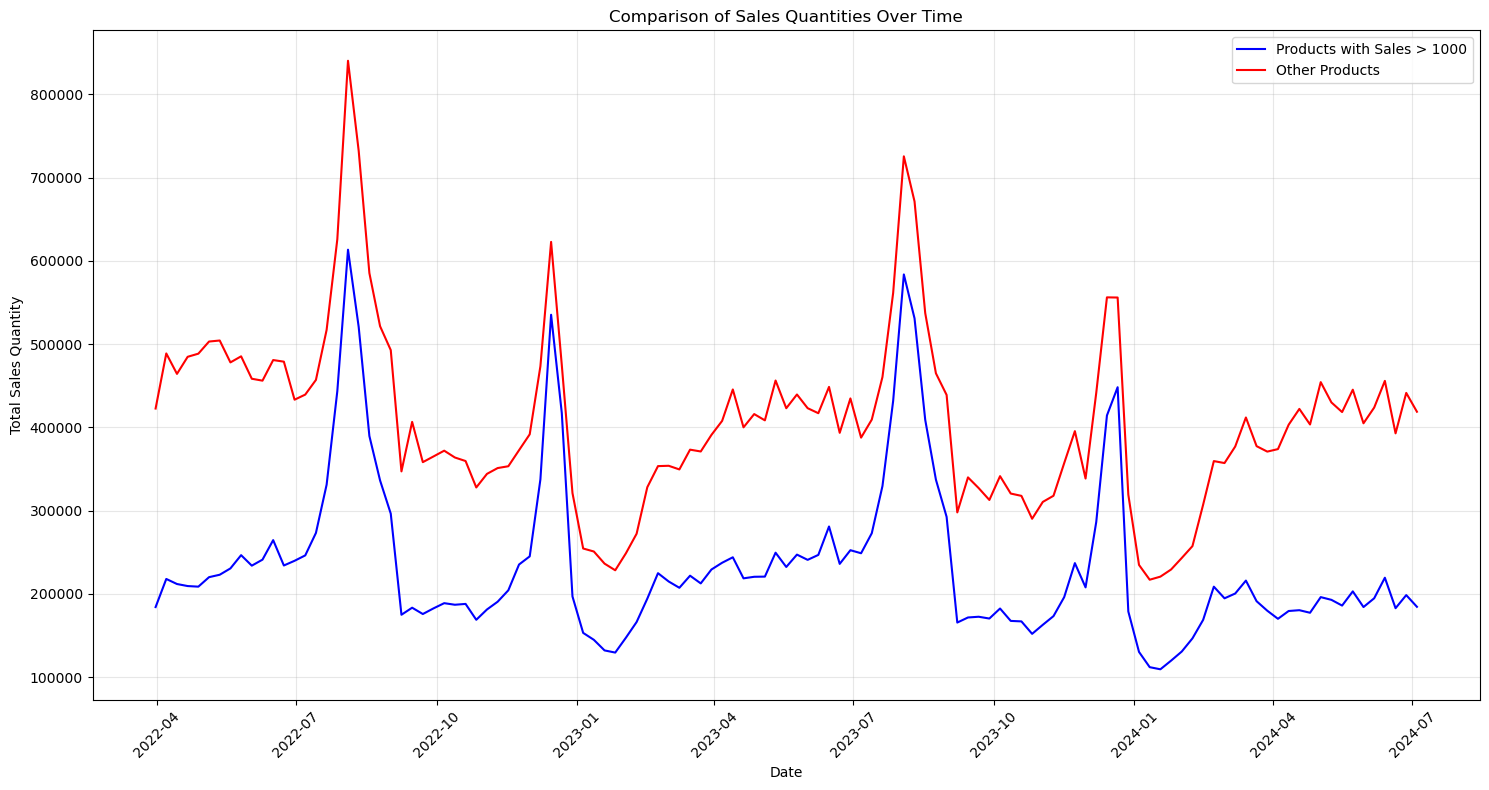


Summary Statistics:
Total sales for products >1000: 27,976,468.0
Total sales for other products: 48,629,823.0


In [28]:
most_selling_1000 = train_df[train_df["sales_quantity"]>1000]

most_selling_1000_ids = most_selling_1000["product_id"].unique()

len(most_selling_1000["product_id"].unique())


# Filter the dataframe for products with sales > 1000
time_series_df = train_df[train_df['product_id'].isin(most_selling_1000_ids)]

# Filter the dataframe for products with sales <= 1000
other_products_df = train_df[~train_df['product_id'].isin(most_selling_1000_ids)]

# Calculate daily sales for both groups
daily_sales_high = time_series_df.groupby('week_starting_date')['sales_quantity'].sum().reset_index()
daily_sales_other = other_products_df.groupby('week_starting_date')['sales_quantity'].sum().reset_index()

# Create the plot
plt.figure(figsize=(15, 8))

# Plot both lines
plt.plot(daily_sales_high['week_starting_date'], daily_sales_high['sales_quantity'], 
         label='Products with Sales > 1000', color='blue')
plt.plot(daily_sales_other['week_starting_date'], daily_sales_other['sales_quantity'], 
         label='Other Products', color='red')

# Customize the plot
plt.xlabel('Date')
plt.ylabel('Total Sales Quantity')
plt.title('Comparison of Sales Quantities Over Time')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

# Optional: Print some summary statistics
print("\nSummary Statistics:")
print(f"Total sales for products >1000: {daily_sales_high['sales_quantity'].sum():,}")
print(f"Total sales for other products: {daily_sales_other['sales_quantity'].sum():,}")

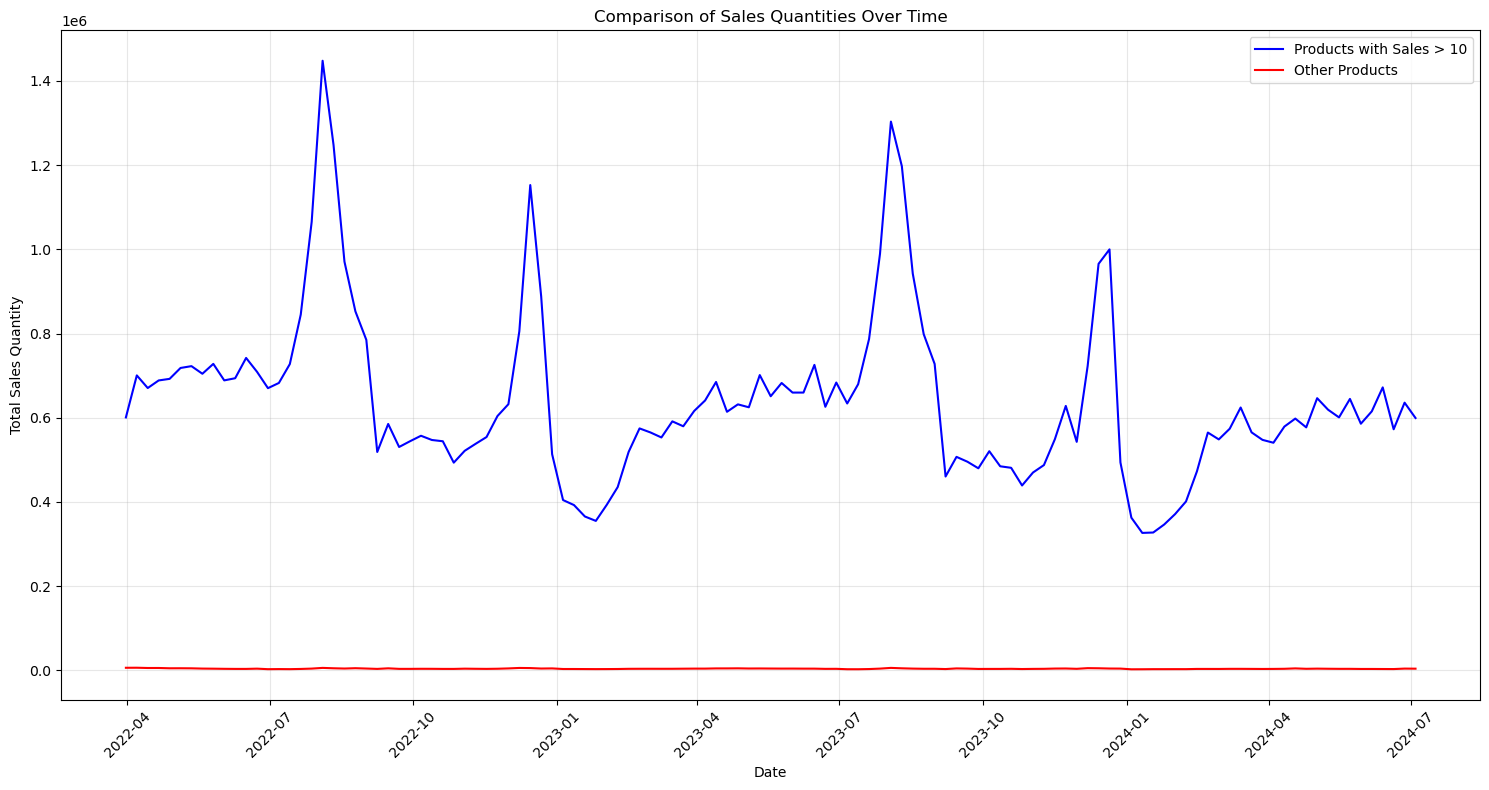


Summary Statistics:
Total sales for products >10: 76,131,340.0
Total sales for other products: 474,951.0


In [29]:
most_selling_10 = train_df[train_df["sales_quantity"]>10]

most_selling_10_ids = most_selling_10["product_id"].unique()

len(most_selling_100["product_id"].unique())


# Filter the dataframe for products with sales > 1000
time_series_df = train_df[train_df['product_id'].isin(most_selling_10_ids)]

# Filter the dataframe for products with sales <= 1000
other_products_df = train_df[~train_df['product_id'].isin(most_selling_10_ids)]

# Calculate daily sales for both groups
daily_sales_high = time_series_df.groupby('week_starting_date')['sales_quantity'].sum().reset_index()
daily_sales_other = other_products_df.groupby('week_starting_date')['sales_quantity'].sum().reset_index()

# Create the plot
plt.figure(figsize=(15, 8))

# Plot both lines
plt.plot(daily_sales_high['week_starting_date'], daily_sales_high['sales_quantity'], 
         label='Products with Sales > 10', color='blue')
plt.plot(daily_sales_other['week_starting_date'], daily_sales_other['sales_quantity'], 
         label='Other Products', color='red')

# Customize the plot
plt.xlabel('Date')
plt.ylabel('Total Sales Quantity')
plt.title('Comparison of Sales Quantities Over Time')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

# Optional: Print some summary statistics
print("\nSummary Statistics:")
print(f"Total sales for products >10: {daily_sales_high['sales_quantity'].sum():,}")
print(f"Total sales for other products: {daily_sales_other['sales_quantity'].sum():,}")

In [30]:
promotions_df

,start_date,end_date,promotion_type
0,4/8/2022,4/18/2022,Promotion 3
1,5/5/2022,5/9/2022,Promotion 1
2,5/26/2022,5/30/2022,Promotion 3
3,6/16/2022,6/21/2022,Promotion 1
4,7/11/2022,7/13/2022,Promotion 3
...,...,...,...
95,7/18/2024,7/28/2024,Promotion 3
96,7/18/2024,7/28/2024,Promotion 3
97,7/18/2024,7/28/2024,Promotion 3
98,7/18/2024,7/28/2024,Promotion 3


In [31]:
train_df

,product_id,week_starting_date,sales_quantity,inventory,sales_revenue,price_without_tax,initial_price
0,0,2022-07-14,8.0,NaN,37.12,NaN,NaN
1,0,2023-07-13,7.0,NaN,34.50,NaN,NaN
2,0,2023-10-05,3.0,NaN,13.11,NaN,NaN
3,1,2023-03-23,2.0,NaN,7.50,NaN,NaN
4,4,2024-06-13,0.0,0.0,0.00,69.99,69.99
...,...,...,...,...,...,...,...
1763854,89712,2022-05-26,11.0,136.0,249.47,29.98,34.99
1763855,89712,2022-10-06,2.0,5.0,38.65,25.98,34.99
1763856,89715,2022-04-07,130.0,6670.0,6041.07,49.99,59.99
1763857,89715,2023-01-12,92.0,2713.0,4918.02,54.99,59.99


In [32]:
import pandas as pd

# Convert dates to datetime format
promotions_df['start_date'] = pd.to_datetime(promotions_df['start_date'])
promotions_df['end_date'] = pd.to_datetime(promotions_df['end_date'])
train_df['week_starting_date'] = pd.to_datetime(train_df['week_starting_date'])

# Calculate promotion duration in days
promotions_df['duration_days'] = (promotions_df['end_date'] - promotions_df['start_date']).dt.days + 1

# Initialize columns for total sales and mean sales
total_sales = []
mean_sales = []

# Calculate sales for each promotion period
for idx, row in promotions_df.iterrows():
    # Filter sales during the promotion period
    mask = (train_df['week_starting_date'] >= row['start_date']) & \
           (train_df['week_starting_date'] <= row['end_date'])
    
    period_sales = train_df[mask]['sales_quantity'].sum()
    
    total_sales.append(period_sales)
    mean_sales.append(period_sales / row['duration_days'])

# Add new columns to promotions_df
promotions_df['total_sales_quantity'] = total_sales
promotions_df['mean_sales_quantity_per_day'] = mean_sales

# Round mean sales to 2 decimal places for better readability
promotions_df['mean_sales_quantity_per_day'] = promotions_df['mean_sales_quantity_per_day'].round(2)

# Display the first few rows of the updated dataframe
print(promotions_df.head())

# Optional: Basic statistics of the new columns
print("\nSummary Statistics:")
print(promotions_df[['total_sales_quantity', 'mean_sales_quantity_per_day']].describe())


  start_date   end_date promotion_type  duration_days  total_sales_quantity  \
0 2022-04-08 2022-04-18    Promotion 3             11              676326.0   
1 2022-05-05 2022-05-09    Promotion 1              5              723396.0   
2 2022-05-26 2022-05-30    Promotion 3              5              732071.0   
3 2022-06-16 2022-06-21    Promotion 1              6              745648.0   
4 2022-07-11 2022-07-13    Promotion 3              3                   0.0   

   mean_sales_quantity_per_day  
0                     61484.18  
1                    144679.20  
2                    146414.20  
3                    124274.67  
4                         0.00  

Summary Statistics:
       total_sales_quantity  mean_sales_quantity_per_day
count          1.000000e+02                   100.000000
mean           6.195414e+05                 85967.367100
std            6.878737e+05                 91513.410508
min            0.000000e+00                     0.000000
25%            0.0000

In [33]:
promotions_df.head(20)

,start_date,end_date,promotion_type,duration_days,total_sales_quantity,mean_sales_quantity_per_day
0,2022-04-08,2022-04-18,Promotion 3,11,676326.0,61484.18
1,2022-05-05,2022-05-09,Promotion 1,5,723396.0,144679.20
2,2022-05-26,2022-05-30,Promotion 3,5,732071.0,146414.20
3,2022-06-16,2022-06-21,Promotion 1,6,745648.0,124274.67
4,2022-07-11,2022-07-13,Promotion 3,3,0.0,0.00
5,2022-07-14,2022-08-03,Promotion 1,21,2648557.0,126121.76
6,2022-07-30,2022-08-02,Promotion 1,4,0.0,0.00
7,2022-08-04,2022-08-15,Promotion 2,12,2706839.0,225569.92
8,2022-08-16,2022-09-04,Promotion 1,20,2622567.0,131128.35
9,2023-01-19,2023-01-28,Promotion 2,10,726787.0,72678.70


In [34]:
import pandas as pd

# Convert dates to datetime format
promotions_df['start_date'] = pd.to_datetime(promotions_df['start_date'])
promotions_df['end_date'] = pd.to_datetime(promotions_df['end_date'])
train_df['week_starting_date'] = pd.to_datetime(train_df['week_starting_date'])

# Calculate promotion duration in days
promotions_df['duration_days'] = (promotions_df['end_date'] - promotions_df['start_date']).dt.days + 1

# Initialize columns for total sales and mean sales
total_sales = []
mean_sales = []

# Calculate sales for each promotion period
for idx, row in promotions_df.iterrows():
    total_period_sales = 0
    
    # Filter relevant weeks
    mask = (train_df['week_starting_date'] <= row['end_date']) & \
           (train_df['week_starting_date'] + pd.Timedelta(days=6) >= row['start_date'])
    relevant_weeks = train_df[mask]
    
    for _, week_data in relevant_weeks.iterrows():
        week_start = week_data['week_starting_date']
        week_end = week_start + pd.Timedelta(days=6)
        daily_sales = week_data['sales_quantity'] / 7  # Assume uniform distribution across week
        
        # Calculate overlap days
        overlap_start = max(week_start, row['start_date'])
        overlap_end = min(week_end, row['end_date'])
        overlap_days = (overlap_end - overlap_start).days + 1
        
        # Add proportional sales for this week
        total_period_sales += daily_sales * overlap_days
    
    total_sales.append(total_period_sales)
    mean_sales.append(total_period_sales / row['duration_days'])

# Add new columns to promotions_df
promotions_df['total_sales_quantity'] = total_sales
promotions_df['mean_sales_quantity_per_day'] = mean_sales

# Round mean sales to 2 decimal places for better readability
promotions_df['mean_sales_quantity_per_day'] = promotions_df['mean_sales_quantity_per_day'].round(2)
promotions_df['total_sales_quantity'] = promotions_df['total_sales_quantity'].round(2)

# Display the first few rows of the updated dataframe
print(promotions_df.head())

# Optional: Basic statistics of the new columns
print("\nSummary Statistics:")
print(promotions_df[['total_sales_quantity', 'mean_sales_quantity_per_day']].describe())


  start_date   end_date promotion_type  duration_days  total_sales_quantity  \
0 2022-04-08 2022-04-18    Promotion 3             11            1089053.14   
1 2022-05-05 2022-05-09    Promotion 1              5             516711.43   
2 2022-05-26 2022-05-30    Promotion 3              5             522907.86   
3 2022-06-16 2022-06-21    Promotion 1              6             639126.86   
4 2022-07-11 2022-07-13    Promotion 3              3             293919.00   

   mean_sales_quantity_per_day  
0                     99004.83  
1                    103342.29  
2                    104581.57  
3                    106521.14  
4                     97973.00  

Summary Statistics:
       total_sales_quantity  mean_sales_quantity_per_day
count          1.000000e+02                   100.000000
mean           5.541520e+05                 78645.760300
std            5.965829e+05                 44104.266549
min            0.000000e+00                     0.000000
25%            7.8583

In [35]:
promotions_df.head(50)

,start_date,end_date,promotion_type,duration_days,total_sales_quantity,mean_sales_quantity_per_day
0,2022-04-08,2022-04-18,Promotion 3,11,1089053.14,99004.83
1,2022-05-05,2022-05-09,Promotion 1,5,516711.43,103342.29
2,2022-05-26,2022-05-30,Promotion 3,5,522907.86,104581.57
3,2022-06-16,2022-06-21,Promotion 1,6,639126.86,106521.14
4,2022-07-11,2022-07-13,Promotion 3,3,293919.00,97973.00
5,2022-07-14,2022-08-03,Promotion 1,21,2648557.00,126121.76
6,2022-07-30,2022-08-02,Promotion 1,4,611201.71,152800.43
7,2022-08-04,2022-08-15,Promotion 2,12,2348862.14,195738.51
8,2022-08-16,2022-09-04,Promotion 1,20,2642227.86,132111.39
9,2023-01-19,2023-01-28,Promotion 2,10,522156.14,52215.61


In [36]:
promotions_df.tail(50)

,start_date,end_date,promotion_type,duration_days,total_sales_quantity,mean_sales_quantity_per_day
50,2023-11-18,2023-11-26,Promotion 2,9,756766.43,84085.16
51,2023-11-26,2023-11-28,Promotion 3,3,271131.43,90377.14
52,2023-11-30,2023-12-07,Promotion 1,8,650601.71,81325.21
53,2023-12-08,2023-12-14,Promotion 2,7,762808.57,108972.65
54,2023-12-15,2023-12-17,Promotion 2,3,415998.86,138666.29
55,2023-12-18,2023-12-20,Promotion 2,3,415998.86,138666.29
56,2023-12-26,2024-01-02,Promotion 4,8,713961.14,89245.14
57,2024-01-11,2024-01-15,Promotion 3,5,235162.14,47032.43
58,2024-01-18,2024-01-27,Promotion 2,10,480097.14,48009.71
59,2024-02-15,2024-02-19,Promotion 1,5,340165.00,68033.00


In [37]:
promotions_df[promotions_df["total_sales_quantity"]!=0].groupby("promotion_type").mean()

,duration_days,total_sales_quantity,mean_sales_quantity_per_day
promotion_type,,,
Promotion 1,8.200000,895327.707500,102162.344500
Promotion 2,6.250000,709199.880833,109380.032500
Promotion 3,5.809524,591269.050714,91679.062381
Promotion 4,6.125000,520617.857500,82281.016250


Statistics by Promotion Type:
               mean_sales_quantity_per_day                                 \
                                      mean       std       min        max   
promotion_type                                                              
Promotion 1                      102162.34  25308.43  68033.00  152800.43   
Promotion 2                      109380.03  46012.09  48009.71  195738.51   
Promotion 3                       91679.06  19323.62  47032.43  119413.77   
Promotion 4                       82281.02  10936.30  66237.14   98205.71   

                     total_sales_quantity                                    
               count                 mean        std        min         max  
promotion_type                                                               
Promotion 1       20            895327.71  804140.31  158103.14  2786917.00  
Promotion 2       12            709199.88  677253.10   92955.43  2348862.14  
Promotion 3       42            591269.0

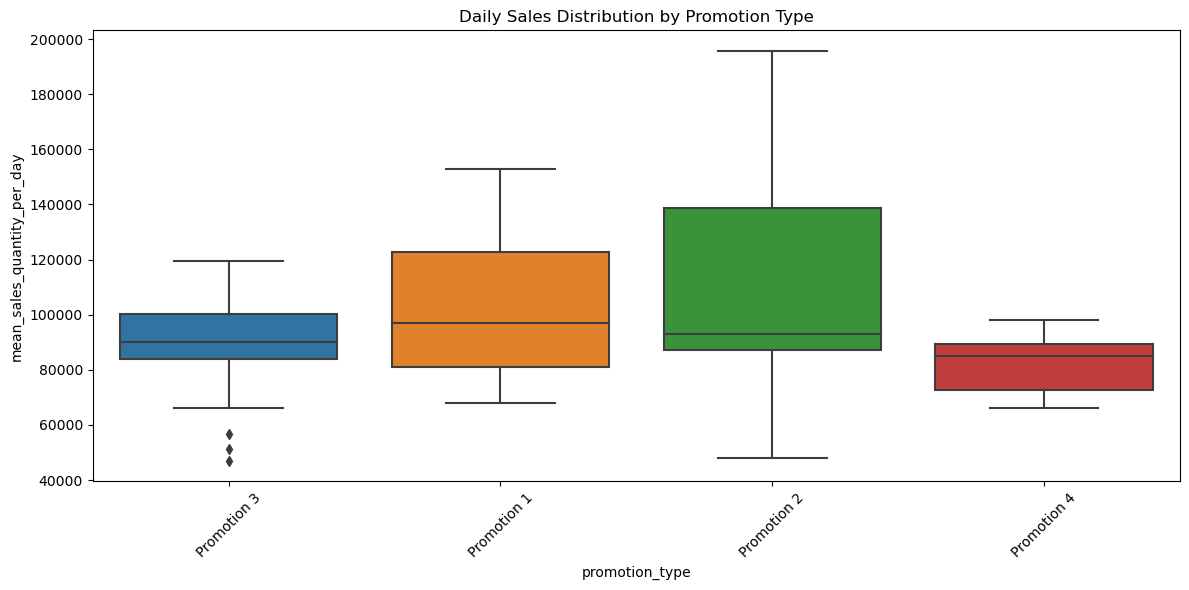

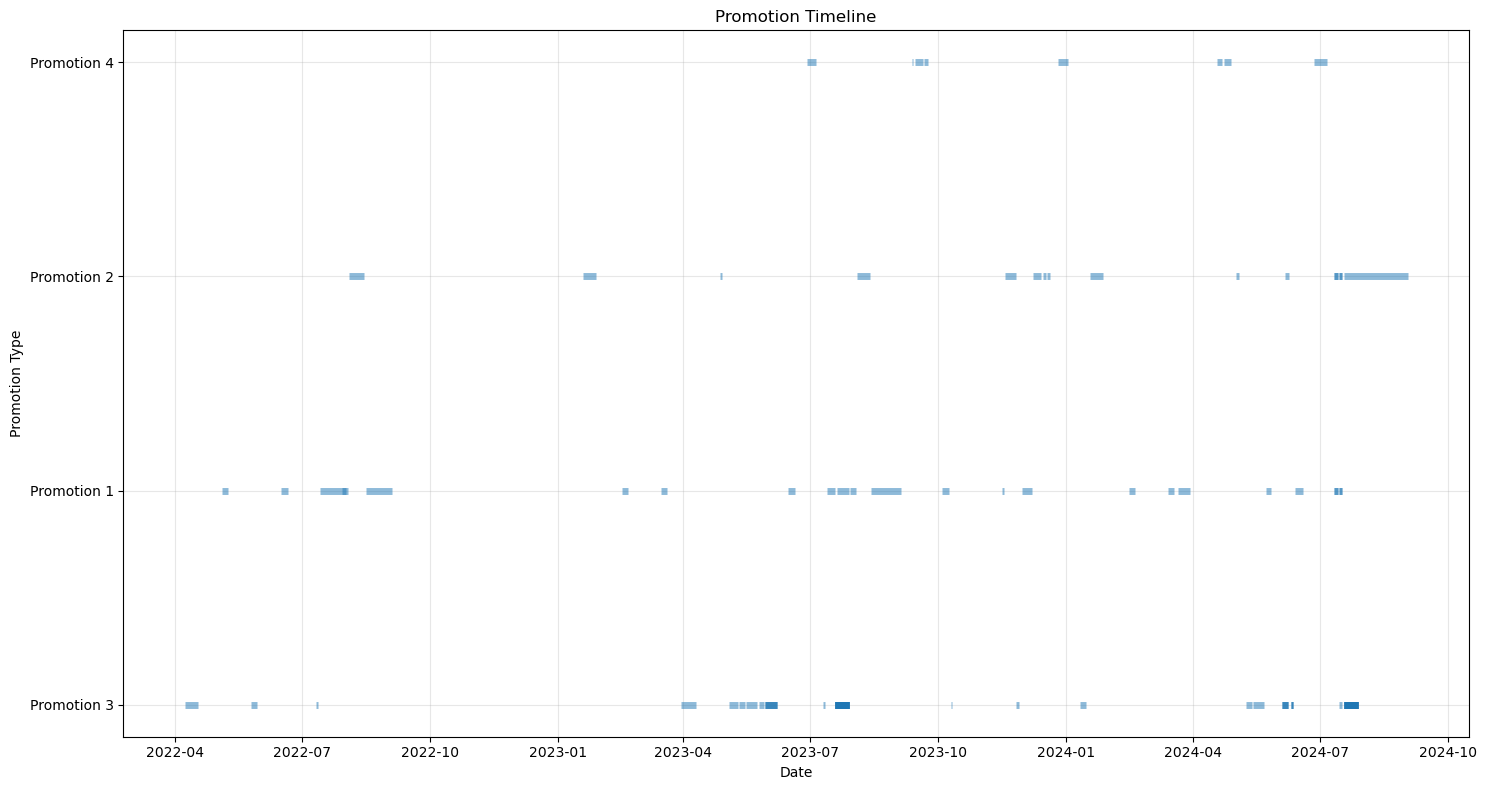


Comparison of Overlapping vs Non-overlapping Promotions:
            mean_sales_quantity_per_day           total_sales_quantity  \
                                   mean       std                 mean   
has_overlap                                                              
False                          91879.19  29179.07            587048.80   
True                          103682.14  18366.47            846948.58   

                        
                   std  
has_overlap             
False        589792.53  
True         571303.92  


C:\Users\dizii\AppData\Local\Temp\ipykernel_17740\2530617961.py:98: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  past_promotions_df['has_overlap'] = past_promotions_df.index.isin(


In [38]:
# Get basic statistics by promotion type

past_promotions_df = promotions_df[promotions_df["total_sales_quantity"]!=0]

promotion_stats = past_promotions_df.groupby('promotion_type').agg({
    'mean_sales_quantity_per_day': ['mean', 'std', 'min', 'max', 'count'],
    'total_sales_quantity': ['mean', 'std', 'min', 'max']
}).round(2)

print("Statistics by Promotion Type:")
print(promotion_stats)

# Function to find overlapping promotions
def find_overlapping_promotions(df):
    overlapping_groups = []
    
    for i, row1 in df.iterrows():
        overlaps = []
        for j, row2 in df.iterrows():
            if i != j:
                # Check if dates overlap
                if (row1['start_date'] <= row2['end_date'] and 
                    row2['start_date'] <= row1['end_date']):
                    overlaps.append(j)
        if overlaps:
            overlaps.append(i)
            overlapping_groups.append(sorted(overlaps))
    
    # Remove duplicate groups
    unique_groups = [tuple(group) for group in overlapping_groups]
    unique_groups = list(set(unique_groups))
    
    return unique_groups

# Find overlapping promotions
overlapping_groups = find_overlapping_promotions(past_promotions_df)

# Analyze overlapping promotions
if overlapping_groups:
    print("\nOverlapping Promotion Analysis:")
    for group in overlapping_groups:
        overlapping_promos = past_promotions_df.iloc[list(group)]
        
        # Get the promotion types involved
        promo_types = overlapping_promos['promotion_type'].unique()
        promo_combo = " + ".join(sorted(promo_types))
        
        # Calculate statistics for this combination
        stats = {
            'mean_sales': overlapping_promos['mean_sales_quantity_per_day'].mean(),
            'total_sales': overlapping_promos['total_sales_quantity'].mean(),
            'count': len(overlapping_promos),
            'avg_duration': overlapping_promos['duration_days'].mean()
        }
        
        print(f"\nCombination: {promo_combo}")
        print(f"Number of occurrences: {stats['count']}")
        print(f"Average daily sales: {stats['mean_sales']:.2f}")
        print(f"Average total sales: {stats['total_sales']:.2f}")
        print(f"Average duration: {stats['avg_duration']:.1f} days")
        
        # Get the date ranges for this combination
        print("Date ranges:")
        for _, promo in overlapping_promos.iterrows():
            print(f"{promo['start_date'].date()} to {promo['end_date'].date()}: {promo['promotion_type']}")
        print("-" * 50)

# Visualize the results
import matplotlib.pyplot as plt
import seaborn as sns

# Box plot of daily sales by promotion type
plt.figure(figsize=(12, 6))
sns.boxplot(x='promotion_type', y='mean_sales_quantity_per_day', data=past_promotions_df)
plt.title('Daily Sales Distribution by Promotion Type')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Create a timeline visualization of promotions
plt.figure(figsize=(15, 8))
for idx, row in promotions_df.iterrows():
    plt.hlines(y=row['promotion_type'], 
              xmin=row['start_date'], 
              xmax=row['end_date'],
              linewidth=5,
              alpha=0.5)

plt.title('Promotion Timeline')
plt.xlabel('Date')
plt.ylabel('Promotion Type')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Optional: Calculate correlation between overlapping promotions and sales
if overlapping_groups:
    past_promotions_df['has_overlap'] = past_promotions_df.index.isin(
        [item for sublist in overlapping_groups for item in sublist]
    )
    
    overlap_stats = past_promotions_df.groupby('has_overlap').agg({
        'mean_sales_quantity_per_day': ['mean', 'std'],
        'total_sales_quantity': ['mean', 'std']
    }).round(2)
    
    print("\nComparison of Overlapping vs Non-overlapping Promotions:")
    print(overlap_stats)


In [39]:
second_submission_df = pd.read_csv('second_submission.csv', delimiter="|")

second_submission_df.groupby("week_starting_date").sum()

FileNotFoundError: [Errno 2] No such file or directory: 'second_submission.csv'

In [ ]:
fourth_submission_df = pd.read_csv('fourth_submission.csv', delimiter="|")

fourth_submission_df.groupby("week_starting_date").sum()

In [ ]:
fifth_submission_df = pd.read_csv('fifth_submission.csv', delimiter="|")

fifth_submission_df.groupby("week_starting_date").sum()

In [ ]:
promotions_df

In [ ]:
def predict_test_sales(test_df, promotions_df, promotion_stats):
    # Get unique week starting dates
    result_df = pd.DataFrame({'week_starting_date': test_df['week_starting_date'].unique()})
    result_df = result_df.sort_values('week_starting_date').reset_index(drop=True)
    result_df['week_end_date'] = result_df['week_starting_date'] + pd.Timedelta(days=6)
    result_df['predicted_sales'] = 0.0
    
    # Get mean daily sales for each promotion type
    mean_daily_sales = promotion_stats['mean_sales_quantity_per_day']['mean']
    
    # Create a date range for each test week
    test_dates = pd.DataFrame({
        'date': pd.date_range(
            start=result_df['week_starting_date'].min(),
            end=result_df['week_end_date'].max()
        )
    })
    
    # Add week_starting_date to test_dates
    test_dates['week_starting_date'] = test_dates['date'] - pd.to_timedelta(test_dates['date'].dt.dayofweek, unit='D')
    
    # Mark which dates have promotions and their types
    test_dates['active_promos'] = 0
    for promo_type in mean_daily_sales.index:
        type_promotions = promotions_df[promotions_df['promotion_type'] == promo_type]
        for _, promo in type_promotions.iterrows():
            mask = (test_dates['date'] >= promo['start_date']) & (test_dates['date'] <= promo['end_date'])
            test_dates.loc[mask, 'active_promos'] += mean_daily_sales[promo_type]
    
    # Group by week and sum up the daily sales
    weekly_sales = test_dates.groupby('week_starting_date')['active_promos'].sum().reset_index()
    
    # Merge with result_df
    result_df = result_df.merge(weekly_sales, on='week_starting_date', how='left')
    result_df['predicted_sales'] = result_df['active_promos'].fillna(0)
    
    return result_df[['week_starting_date', 'predicted_sales']]

# Generate predictions
predictions = predict_test_sales(test_df, promotions_df, promotion_stats)

# Display results
print("\nPredictions for test weeks:")
print(predictions)




In [ ]:
second_submission_df

In [41]:
def predict_test_sales(test_df, promotions_df, promotion_stats):
    # Print diagnostic information
    print("Test weeks:")
    print(test_df['week_starting_date'].unique())
    
    print("\nPromotions during test period:")
    mask = (promotions_df['start_date'] <= test_df['week_starting_date'].max() + pd.Timedelta(days=6)) & \
           (promotions_df['end_date'] >= test_df['week_starting_date'].min())
    print(promotions_df[mask][['promotion_type', 'start_date', 'end_date']])
    
    print("\nPromotion statistics:")
    print(promotion_stats)
    
    # Get unique week starting dates
    result_df = pd.DataFrame({'week_starting_date': test_df['week_starting_date'].unique()})
    result_df = result_df.sort_values('week_starting_date').reset_index(drop=True)
    result_df['week_end_date'] = result_df['week_starting_date'] + pd.Timedelta(days=6)
    result_df['predicted_sales'] = 0.0
    
    # Get mean daily sales for each promotion type
    mean_daily_sales = promotion_stats['mean_sales_quantity_per_day']['mean']
    
    # For each week, calculate the sales based on active promotions
    for idx, row in result_df.iterrows():
        week_start = row['week_starting_date']
        week_end = row['week_end_date']
        
        # Find promotions active during this week
        active_promos = promotions_df[
            (promotions_df['start_date'] <= week_end) & 
            (promotions_df['end_date'] >= week_start)
        ]
        
        if len(active_promos) > 0:
            for _, promo in active_promos.iterrows():
                # Calculate overlap days
                overlap_start = max(week_start, promo['start_date'])
                overlap_end = min(week_end, promo['end_date'])
                overlap_days = (overlap_end - overlap_start).days + 1
                
                # Add sales for this promotion
                daily_sales = mean_daily_sales[promo['promotion_type']]
                result_df.loc[idx, 'predicted_sales'] += daily_sales * overlap_days
            
            # If multiple promotions, take average
            if len(active_promos) > 1:
                result_df.loc[idx, 'predicted_sales'] /= len(active_promos)

    
    return result_df[['week_starting_date', 'predicted_sales']]

# Generate predictions
predictions = predict_test_sales(test_df, promotions_df, promotion_stats)

# Display results
print("\nFinal Predictions for test weeks:")
print(predictions)


Test weeks:
['2024-07-25T00:00:00.000000000' '2024-07-11T00:00:00.000000000'
 '2024-08-01T00:00:00.000000000' '2024-07-18T00:00:00.000000000']

Promotions during test period:
   promotion_type start_date   end_date
82    Promotion 1 2024-07-11 2024-07-14
83    Promotion 2 2024-07-11 2024-07-14
84    Promotion 1 2024-07-11 2024-07-14
85    Promotion 2 2024-07-11 2024-07-14
86    Promotion 3 2024-07-15 2024-07-17
87    Promotion 1 2024-07-15 2024-07-17
88    Promotion 2 2024-07-15 2024-07-17
89    Promotion 1 2024-07-15 2024-07-17
90    Promotion 2 2024-07-15 2024-07-17
91    Promotion 3 2024-07-18 2024-07-28
92    Promotion 3 2024-07-18 2024-07-28
93    Promotion 3 2024-07-18 2024-07-28
94    Promotion 3 2024-07-18 2024-07-28
95    Promotion 3 2024-07-18 2024-07-28
96    Promotion 3 2024-07-18 2024-07-28
97    Promotion 3 2024-07-18 2024-07-28
98    Promotion 3 2024-07-18 2024-07-28
99    Promotion 2 2024-07-18 2024-09-02

Promotion statistics:
               mean_sales_quantity_per_day

In [56]:
last_date = train_df['week_starting_date'].max()
two_months_ago = last_date - pd.DateOffset(months=2)

# Filter sales data for the last two months
recent_sales = train_df[train_df['week_starting_date'] >= two_months_ago]

# Calculate the number of weeks ago for each week
recent_sales['weeks_ago'] = (last_date - recent_sales['week_starting_date']).dt.days // 7

# Assign weights inversely proportional to the number of weeks ago
recent_sales['weight'] = 1 / (recent_sales['weeks_ago'] + 1)  # More weight to recent weeks

# Calculate the weighted average sales for each product
weighted_sales = recent_sales.groupby('product_id').apply(
    lambda x: (x['sales_quantity'] * x['weight']).sum() / x['weight'].sum()
).reset_index(name='weighted_sales')

# Calculate the total weighted sales across all products
total_weighted_sales = weighted_sales['weighted_sales'].sum()

# Compute the sales ratio for each product
weighted_sales['sales_ratio'] = weighted_sales['weighted_sales'] / total_weighted_sales

# If there are products in the test set but not in the recent sales, assign a default ratio
# Default ratio is calculated as an average of the existing ratios
missing_products = set(test_df['product_id']) - set(weighted_sales['product_id'])
default_ratio = weighted_sales['sales_ratio'].mean()

# Add missing products with the default ratio
missing_data = pd.DataFrame({'product_id': list(missing_products), 
                             'weighted_sales': 0, 
                             'sales_ratio': default_ratio})
weighted_sales = pd.concat([weighted_sales, missing_data], ignore_index=True)

weighted_sales = weighted_sales.set_index('product_id')

# Merge predictions with sales ratios
predictions['key'] = 1
weighted_sales = weighted_sales.reset_index()
weighted_sales['key'] = 1

merged_predictions = pd.merge(
    predictions[['week_starting_date', 'predicted_sales', 'key']],
    weighted_sales[['product_id', 'sales_ratio', 'key']],
    on='key'
).drop('key', axis=1)

# Calculate predicted sales per product
merged_predictions['predicted_product_sales'] = merged_predictions['predicted_sales'] * merged_predictions['sales_ratio']

# Final output
final_predictions = merged_predictions[['week_starting_date', 'product_id', 'predicted_product_sales']]


C:\Users\dizii\AppData\Local\Temp\ipykernel_17740\1936375942.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  recent_sales['weeks_ago'] = (last_date - recent_sales['week_starting_date']).dt.days // 7
C:\Users\dizii\AppData\Local\Temp\ipykernel_17740\1936375942.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  recent_sales['weight'] = 1 / (recent_sales['weeks_ago'] + 1)  # More weight to recent weeks


In [58]:
from sklearn.metrics import mean_squared_log_error
sixth_submission = pd.read_csv("data/sixth_submission.csv", delimiter = "|")
y_val = sixth_submission.prediction


seventh_submission_df = sample_submission_df.copy()

seventh_submission_df = seventh_submission_df.merge(final_predictions, on=["product_id","week_starting_date"], how="left")

seventh_submission_df["prediction"] = seventh_submission_df["predicted_product_sales"]

seventh_submission_df = seventh_submission_df[["product_id", "week_starting_date", "prediction"]]

# Making negative numbers in prediction equal to 0
seventh_submission_df.loc[seventh_submission_df["prediction"] < 0, "prediction"] = 0

seventh_submission_df.fillna(0,inplace=True)

print(seventh_submission_df.describe())

          product_id     prediction
count  144980.000000  144980.000000
mean    43665.162974      15.330536
std     24801.597894      80.271642
min         2.000000       0.000000
25%     22941.000000       0.000000
50%     42246.000000       0.034053
75%     64544.000000       0.434997
max     89717.000000    4430.915747


In [ ]:
seventh_submission_df.describe()

In [59]:
seventh_submission_df.to_csv('promotion_sales_calculations.csv', index=False,sep="|")

In [ ]:
seventh_submission_df

In [ ]:
# Eight submission as an ensemble of (2*second + fourth + seventh)/4


import pandas as pd
second_submission_df = pd.read_csv('second_submission.csv',delimiter="|")
fourth_submission_df = pd.read_csv('fourth_submission.csv',delimiter="|")
seventh_submission_df = pd.read_csv('seventh_submission.csv', delimiter="|")

eighth_submission_df = second_submission_df.copy()
eighth_submission_df["prediction"] = (2 * second_submission_df["prediction"] + fourth_submission_df["prediction"] + seventh_submission_df["prediction"]) / 4

# Making negative numbers in prediction equal to 0
eighth_submission_df.loc[eighth_submission_df["prediction"] < 0, "prediction"] = 0

eighth_submission_df.fillna(0,inplace=True)

eighth_submission_df.to_csv('eighth_submission.csv', index=False, sep="|")

In [ ]:
eighth_submission_df.describe()

In [ ]:
eighth_submission_df

In [ ]:
second_submission_df

In [ ]:
difference_eight_minus_second_df = eighth_submission_df.copy()
difference_eight_minus_second_df["prediction"] = eighth_submission_df["prediction"] - second_submission_df["prediction"]

In [ ]:
difference_eight_minus_second_df[difference_eight_minus_second_df["prediction"]!=0]

In [ ]:
	product_id	week_starting_date	prediction
2	80430	2024-08-01	-0.438848
3	14405	2024-07-25	0.047862
5	11470	2024-07-11	0.274714
6	40379	2024-07-25	-7.534269
7	38280	2024-08-01	7.561541
...	...	...	...
144970	23417	2024-07-18	1.173948
144971	66106	2024-07-11	-17.865715
144972	23601	2024-07-25	0.074687
144974	43152	2024-07-25	0.045586
144978	2541	2024-07-11	0.042671

In [ ]:
difference_eight_minus_second_divided_by_second_df = difference_eight_minus_second_df
difference_eight_minus_second_divided_by_second_df["prediction"] = difference_eight_minus_second_df["prediction"] / second_submission_df["prediction"]

In [ ]:
difference_eight_minus_second_divided_by_second_df.fillna(0, inplace=True)
difference_eight_minus_second_divided_by_second_df[difference_eight_minus_second_divided_by_second_df["prediction"]==np.inf] = 0

In [ ]:
difference_eight_minus_second_divided_by_second_df.sort_values(by='prediction', ascending=False)

In [ ]:
difference_eight_minus_second_divided_by_second_df